# Importing all necessary libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy

Importing the **DATASET**

In [6]:
water = pd.read_csv("/water_potability.csv")


Basic Inspection

In [8]:
print(water.shape)
water.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Checking NULL values

In [9]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Filling NULL

In [10]:
water['ph']=water['ph'].fillna(water.groupby(['Potability'])['ph'].transform('mean'))
water['Sulfate']=water['Sulfate'].fillna(water.groupby(['Potability'])['Sulfate'].transform('mean'))
water['Trihalomethanes']=water['Trihalomethanes'].fillna(water.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

Dropping pH=0

In [11]:
water.drop(3014, inplace=True)

data distribution and density in the **dataframe**

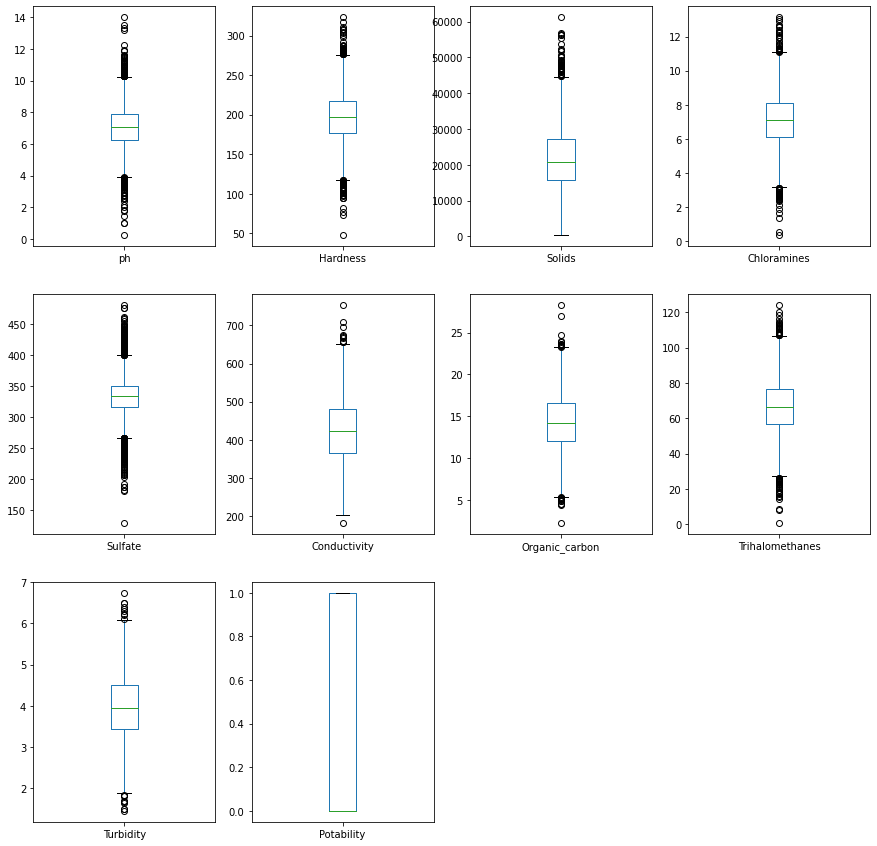

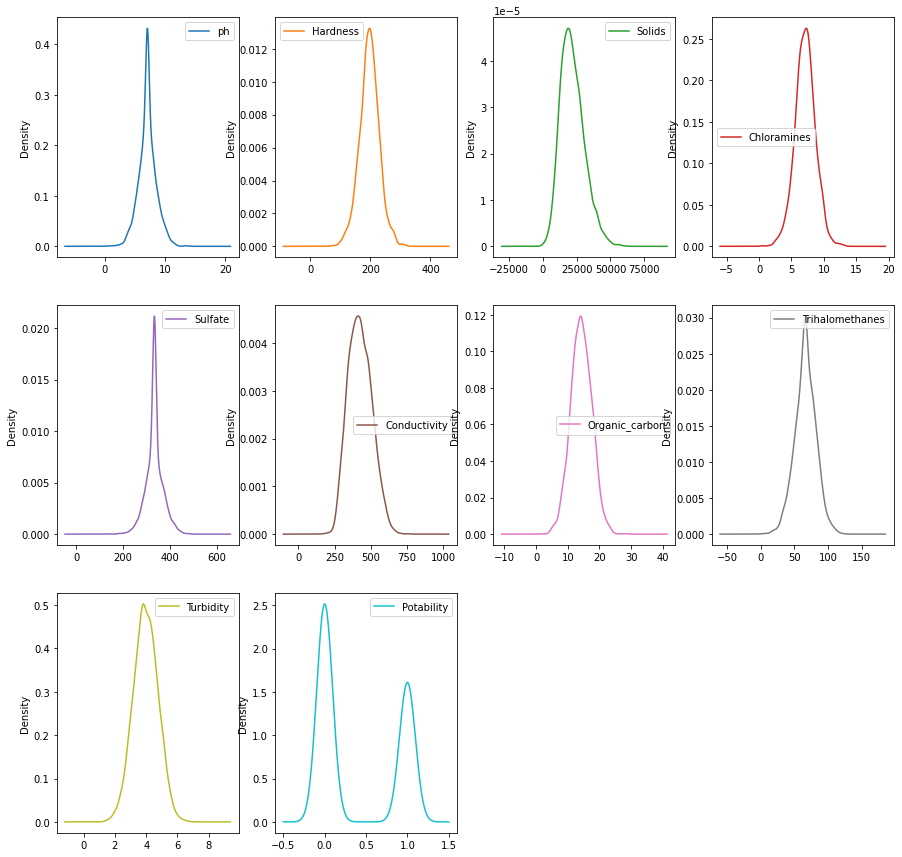

In [12]:
water.plot(kind = "box",
                layout = (3,4),
                subplots = True,
                figsize = (15,15))

water.plot(kind = "density",
                layout = (3,4),
                subplots = True,
                figsize = (15,15),
                sharex = False)

plt.show()

There is non-normal distribution and many outliers as well

Using the Box Cox transformation in the data. Before = Blue ; After = Red.

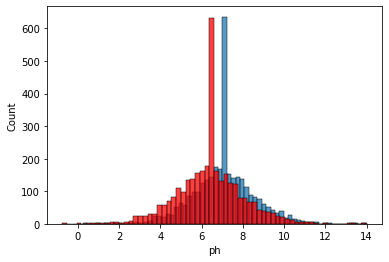

In [13]:
sns.histplot(water["ph"])

water["ph"], fitted_lambda= scipy.stats.boxcox(water["ph"])

sns.histplot(water["ph"], color="Red");

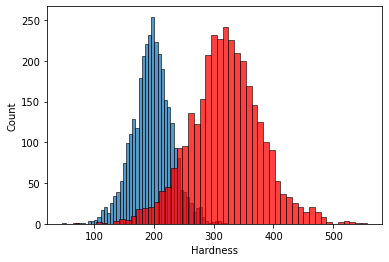

In [14]:
sns.histplot(water["Hardness"])

water["Hardness"], fitted_lambda= scipy.stats.boxcox(water["Hardness"])

sns.histplot(water["Hardness"], color="Red");

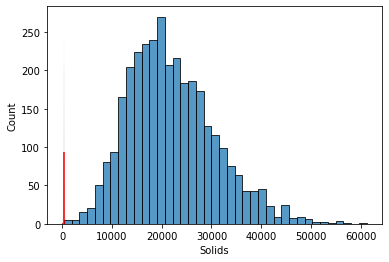

In [15]:
sns.histplot(water["Solids"])

water["Solids"], fitted_lambda= scipy.stats.boxcox(water["Solids"])

sns.histplot(water["Solids"], color="Red");

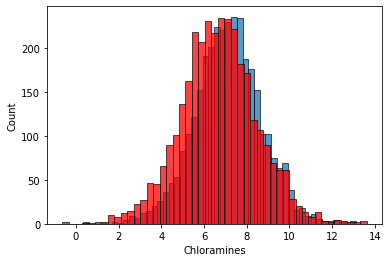

In [16]:
sns.histplot(water["Chloramines"])

water["Chloramines"], fitted_lambda= scipy.stats.boxcox(water["Chloramines"])

sns.histplot(water["Chloramines"], color="Red");


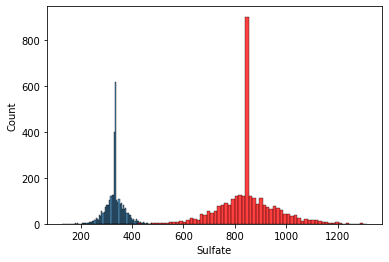

In [17]:
sns.histplot(water["Sulfate"])

water["Sulfate"], fitted_lambda= scipy.stats.boxcox(water["Sulfate"])

sns.histplot(water["Sulfate"], color="Red");

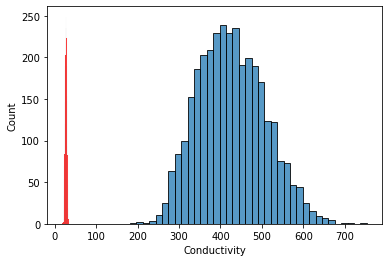

In [18]:
sns.histplot(water["Conductivity"])

water["Conductivity"], fitted_lambda= scipy.stats.boxcox(water["Conductivity"])

sns.histplot(water["Conductivity"], color="Red");

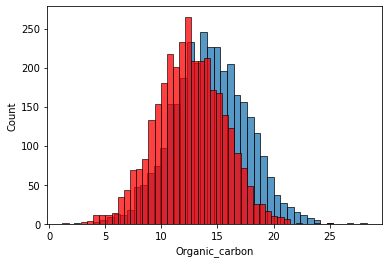

In [19]:
sns.histplot(water["Organic_carbon"])

water["Organic_carbon"], fitted_lambda= scipy.stats.boxcox(water["Organic_carbon"])

sns.histplot(water["Organic_carbon"], color="Red");

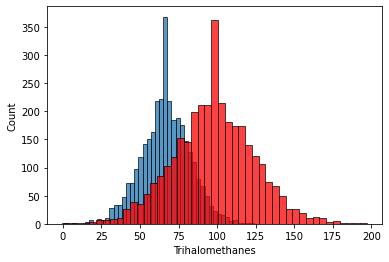

In [20]:
sns.histplot(water["Trihalomethanes"])

water["Trihalomethanes"], fitted_lambda= scipy.stats.boxcox(water["Trihalomethanes"])

sns.histplot(water["Trihalomethanes"], color="Red");

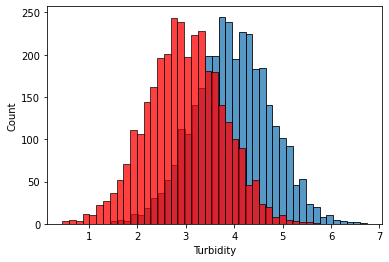

In [21]:
sns.histplot(water["Turbidity"])

water["Turbidity"], fitted_lambda= scipy.stats.boxcox(water["Turbidity"])

sns.histplot(water["Turbidity"], color="Red");


Finding **Coorelation** among features

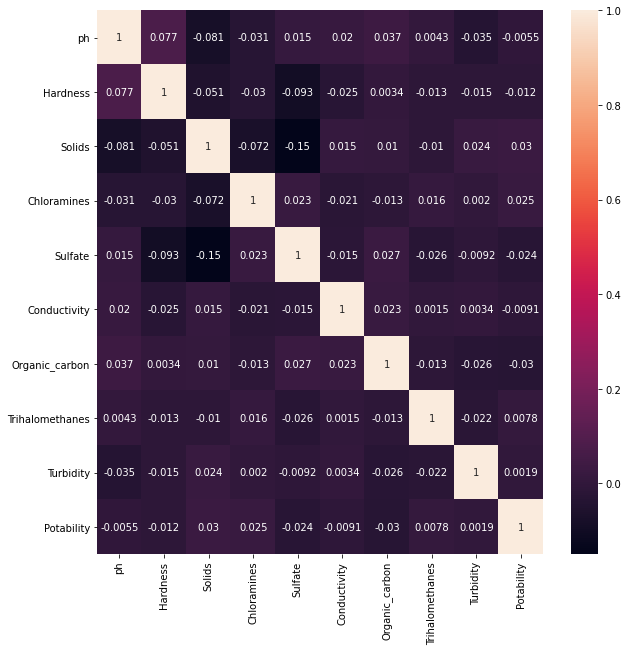

In [22]:
matrix_cor = water.corr()
ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_cor, annot=True)

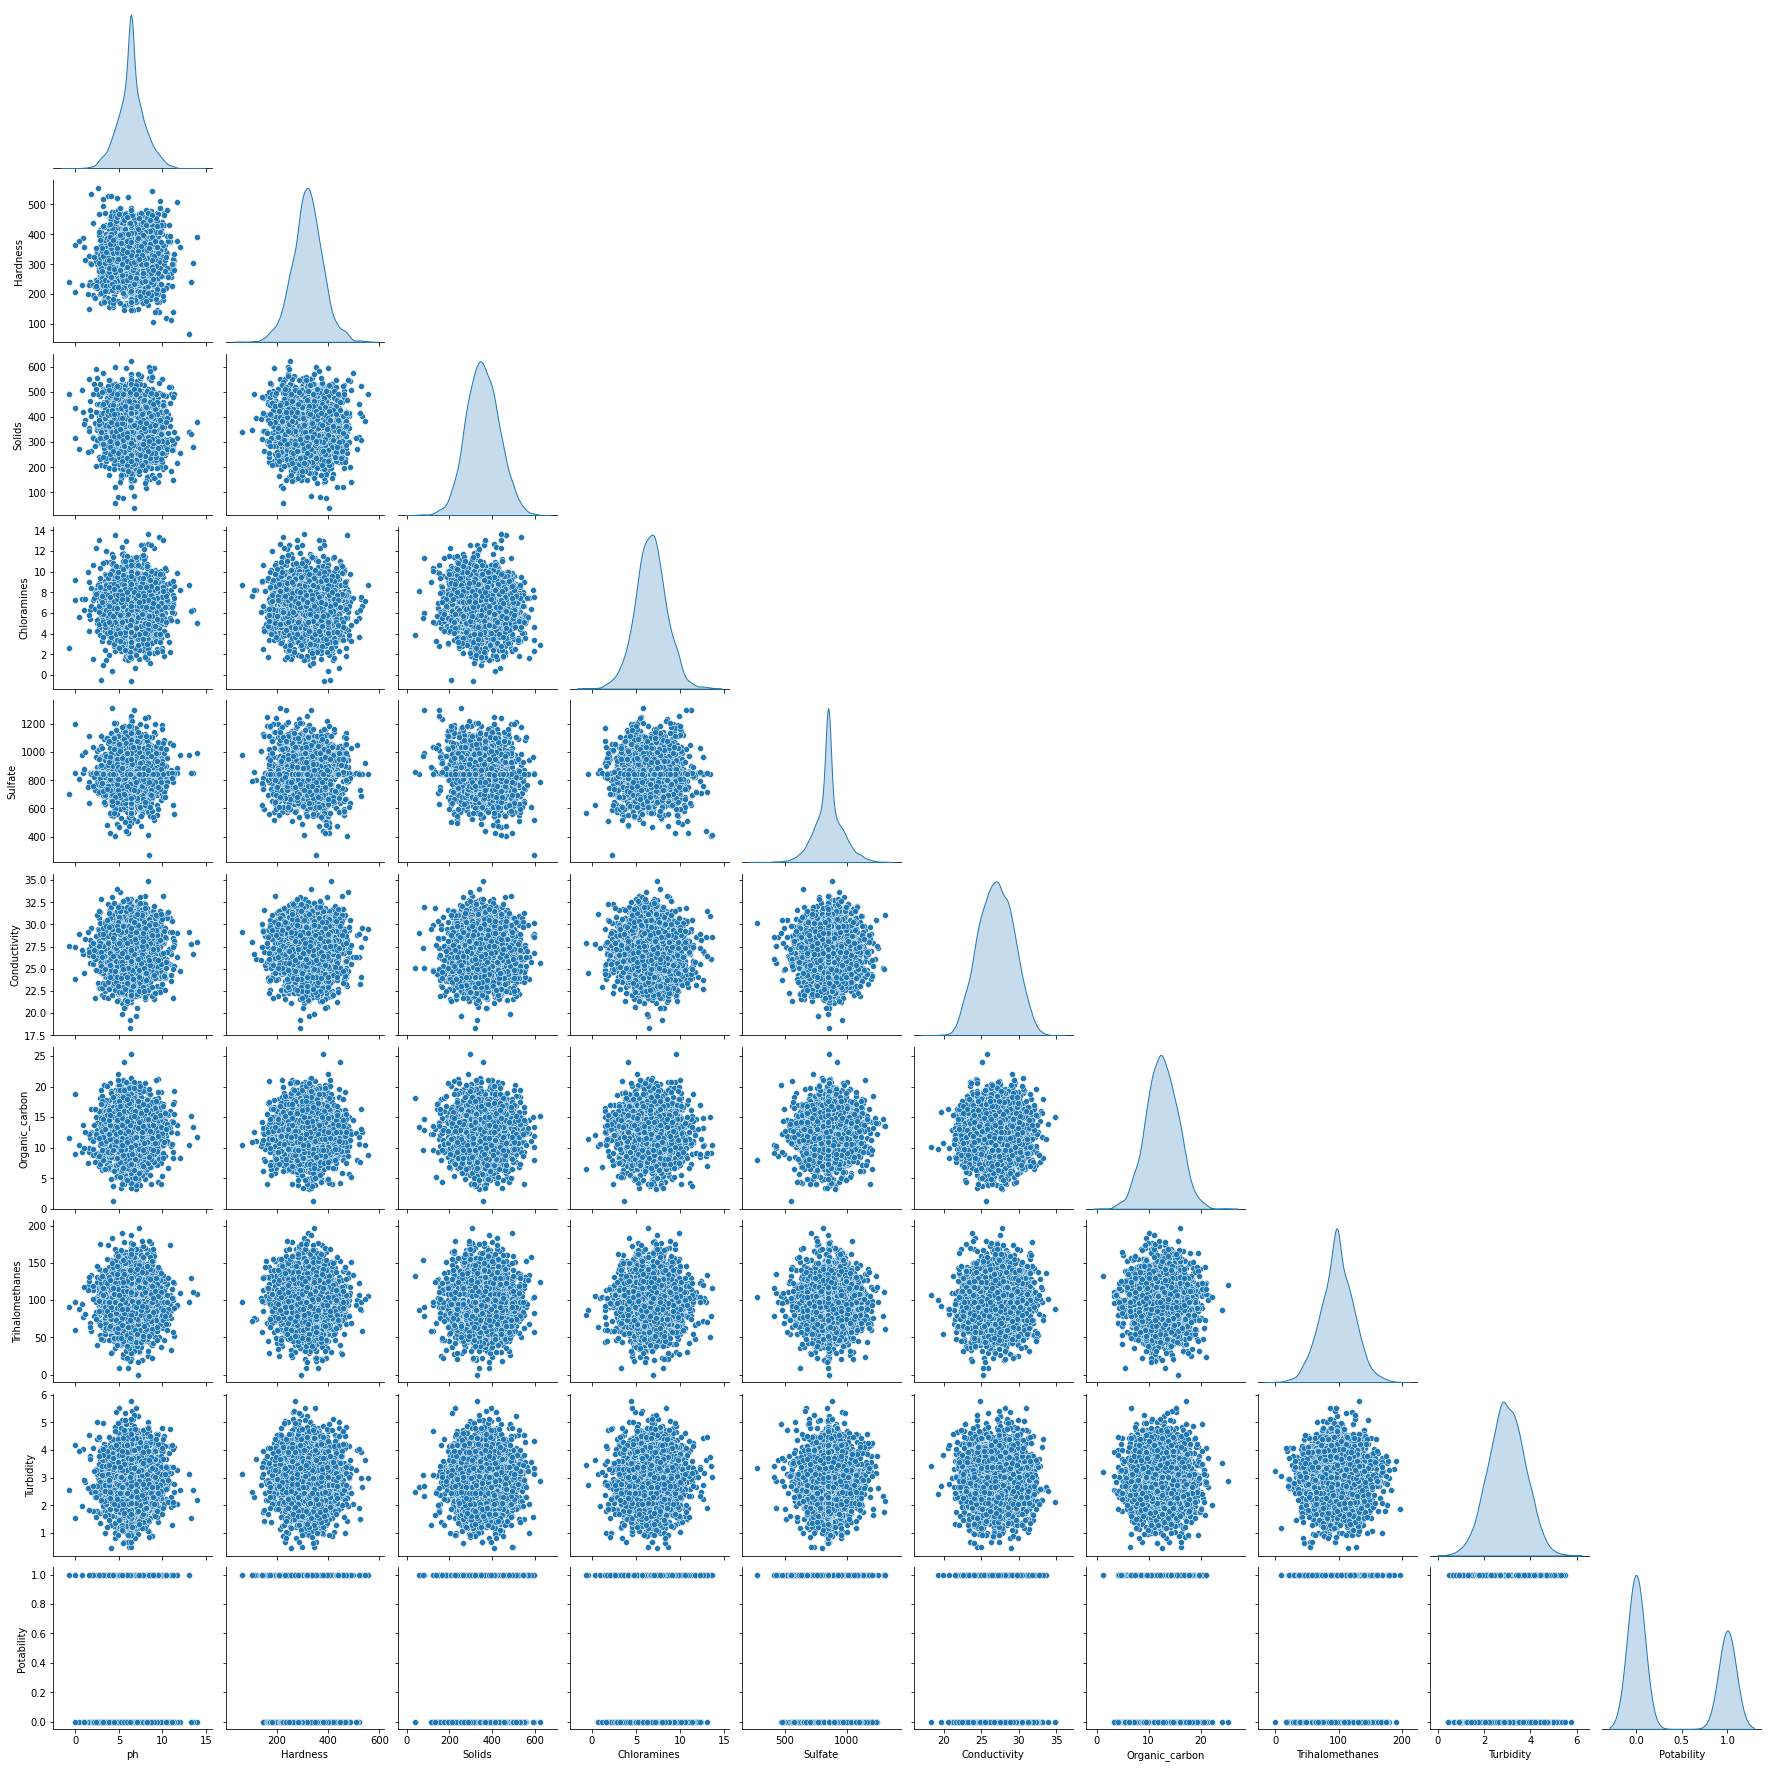

In [23]:
sns.pairplot(water, diag_kind = "kde", corner = True);

**MODEL** Building

In [24]:
water_X = water.drop("Potability", axis=1)
water_y = water["Potability"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(water_X, water_y, test_size=0.2)

LOG REG

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Score**

In [27]:
logreg.score(X_test, y_test)

0.6534351145038167

In [28]:
logreg_preds = logreg.predict(X_test)
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       425
           1       1.00      0.01      0.03       230

    accuracy                           0.65       655
   macro avg       0.83      0.51      0.41       655
weighted avg       0.77      0.65      0.52       655



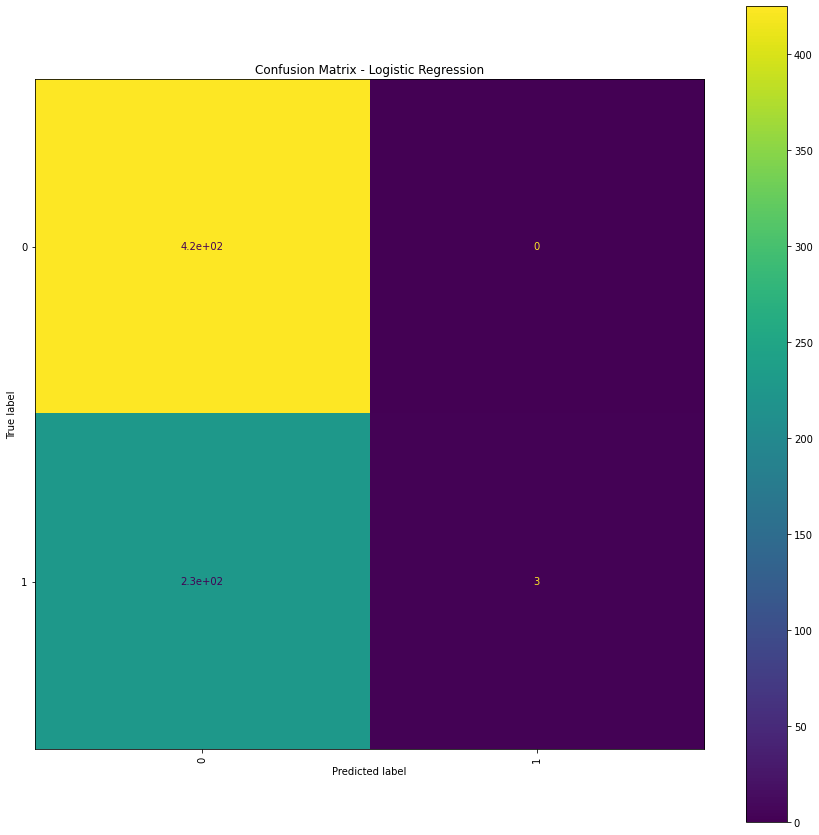

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Confusion Matrix - Logistic Regression")
metrics.plot_confusion_matrix(logreg, X_test, y_test, xticks_rotation="vertical", ax=ax)

In [31]:
y_score_logreg = logreg.predict_proba(X_test)[:,1]
false_positive_rate_logreg, true_positive_rate_logreg, threshold_logreg = roc_curve(y_test, y_score_logreg)
print("roc_auc_score for Logistic Regression: ", roc_auc_score(y_test, y_score_logreg))

roc_auc_score for Logistic Regression:  0.4964398976982096


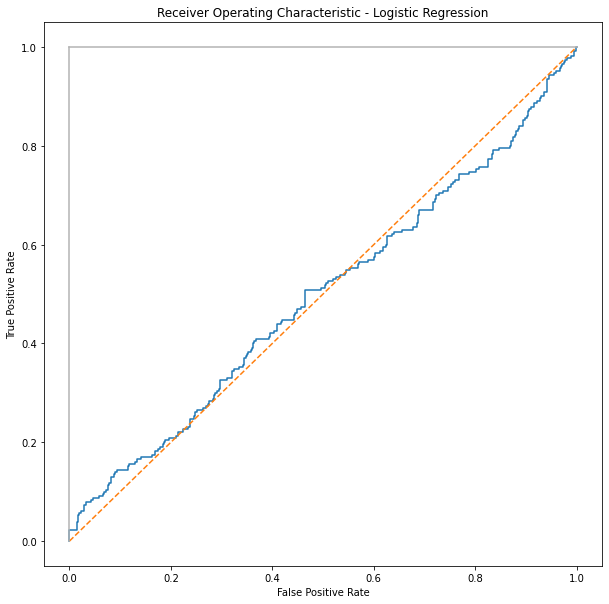

In [32]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Decision Tree

In [33]:
dectree = DecisionTreeClassifier(random_state=42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Score**

In [34]:
dectree.score(X_test, y_test)

0.7343511450381679

In [35]:
logreg_dectree = dectree.predict(X_test)
print(classification_report(y_test, logreg_dectree))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       425
           1       0.62      0.64      0.63       230

    accuracy                           0.73       655
   macro avg       0.71      0.71      0.71       655
weighted avg       0.74      0.73      0.74       655



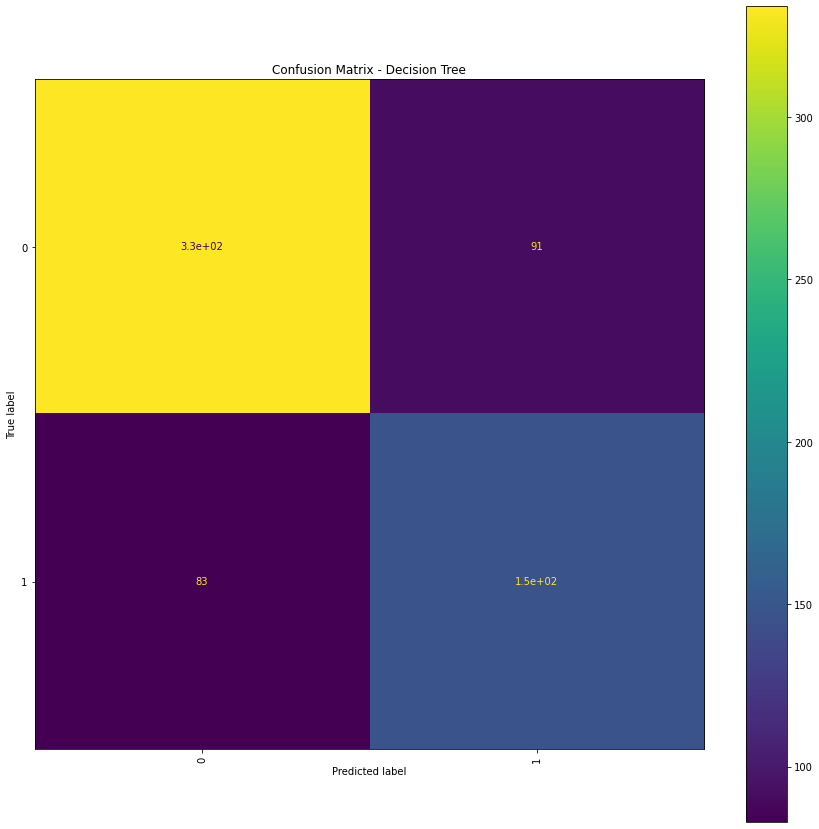

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Confusion Matrix - Decision Tree")
metrics.plot_confusion_matrix(dectree, X_test, y_test, xticks_rotation="vertical", ax=ax)

In [37]:
y_score_dectree = dectree.predict_proba(X_test)[:,1]
false_positive_rate_dectree, true_positive_rate_dectree, threshold_dectree = roc_curve(y_test, y_score_dectree)
print("roc_auc_score for DecisionTree: ", roc_auc_score(y_test, y_score_dectree))


roc_auc_score for DecisionTree:  0.7125063938618926


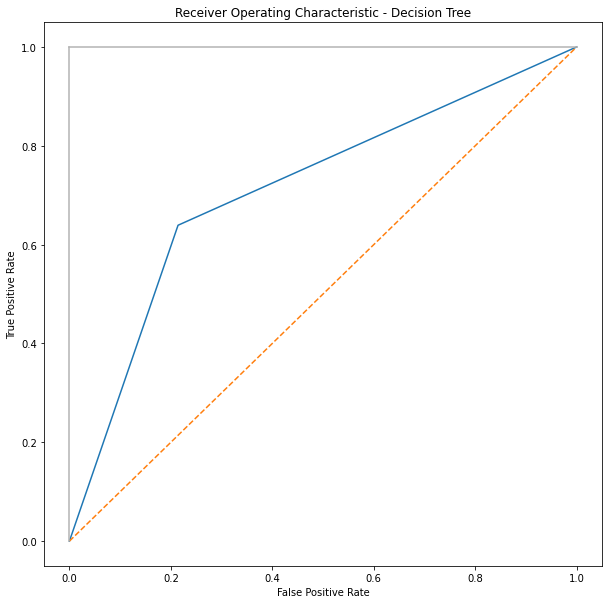

In [38]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate_dectree, true_positive_rate_dectree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST

In [39]:
random = RandomForestClassifier(max_depth=14,
                                n_estimators=600,
                                n_jobs=-1)
random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

**Scoring**

In [40]:
random.score(X_test, y_test)

0.7938931297709924

In [41]:
logreg_random = random.predict(X_test)
print(classification_report(y_test, logreg_random))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       425
           1       0.75      0.62      0.68       230

    accuracy                           0.79       655
   macro avg       0.78      0.75      0.76       655
weighted avg       0.79      0.79      0.79       655



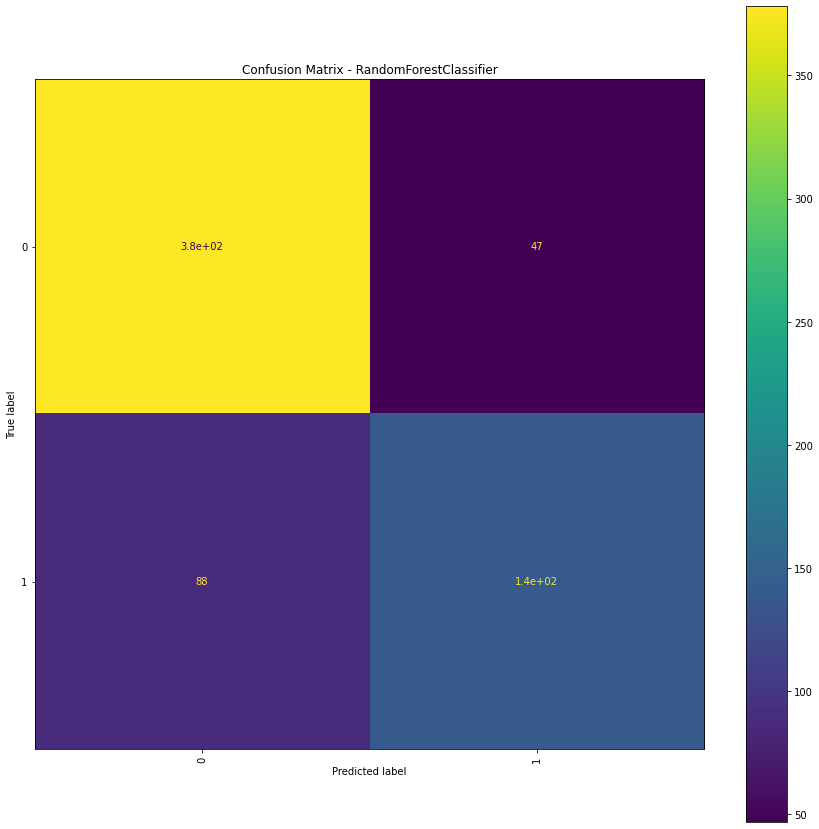

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Confusion Matrix - RandomForestClassifier")
metrics.plot_confusion_matrix(random, X_test, y_test, xticks_rotation="vertical", ax=ax)

In [43]:
y_score_random = random.predict_proba(X_test)[:,1]
false_positive_rate_random, true_positive_rate_random, threshold_random = roc_curve(y_test, y_score_random)
print("roc_auc_score for RandomForestClassifier: ", roc_auc_score(y_test, y_score_random))

roc_auc_score for RandomForestClassifier:  0.855846547314578


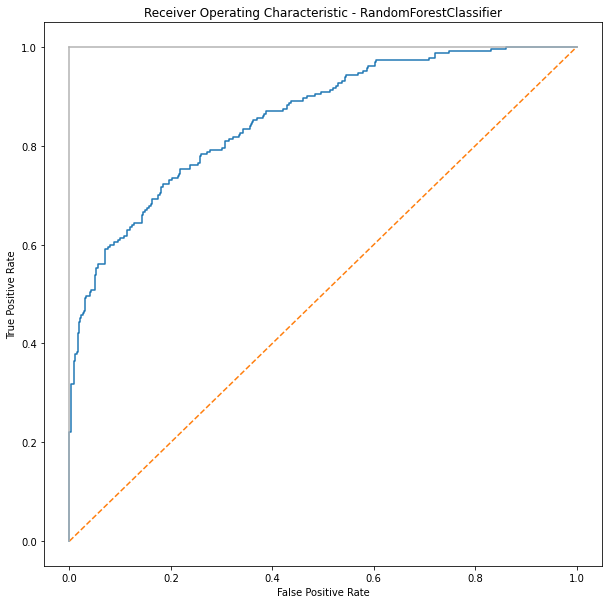

In [44]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_random, true_positive_rate_random)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Feature Importance analysis of Random Forest

In [46]:
importance = random.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.19509
Feature: 1, Score: 0.08989
Feature: 2, Score: 0.08028
Feature: 3, Score: 0.08271
Feature: 4, Score: 0.30114
Feature: 5, Score: 0.06495
Feature: 6, Score: 0.06189
Feature: 7, Score: 0.06398
Feature: 8, Score: 0.06006


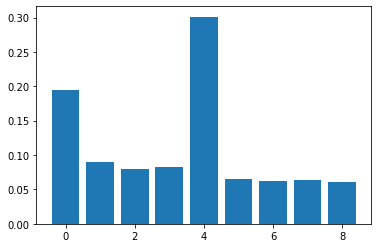

In [47]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Receiver Operating Curve for all three models.

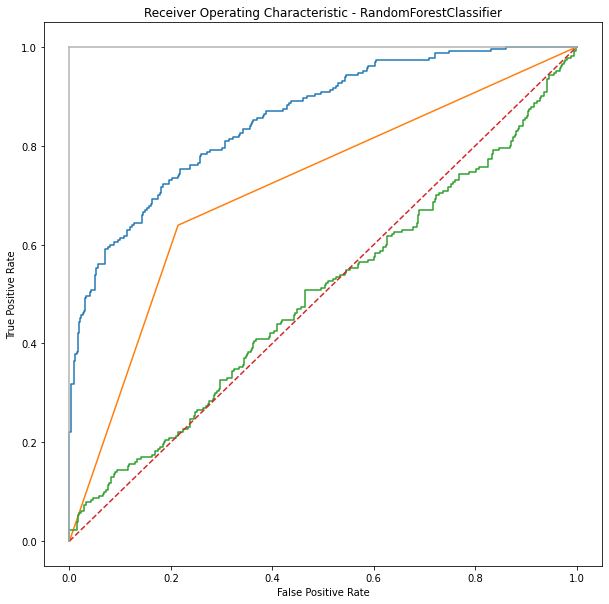

In [48]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_random, true_positive_rate_random)
plt.plot(false_positive_rate_dectree, true_positive_rate_dectree)
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The best model still came short around 10% from the desired accuracy. The Random Forest model labeled 38 water samples of non-potable water as potable. This could cause an enormous variety of illnesses for those who might drink from these waters. Also, the model labeled 92 potable water samples as non-potable, therefore, depriving the local population of a good water source. I find solace in the fact that 525 samples were labeled correctly.